In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL 
import tensorflow as tf
import pathlib
import os
import shutil
import random
import math

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
current_path = os.getcwd() # get the path of this current file
print(current_path)
image_path = current_path.removesuffix("OmniModel") + "\\animals\\Dog Breeds\\images\\Images" # prefix it to the path of the images
image_dir = pathlib.Path(image_path).with_suffix('') # get that path as a diretory.
print(image_dir.absolute())

c:\Users\ArtBot\Desktop\Python Projects\Capstone Sample\OmniModel
c:\Users\ArtBot\Desktop\Python Projects\Capstone Sample\animals\Dog Breeds\images\Images


In [8]:
import PIL.Image

image_count = len(list(image_dir.glob("*/*"))) #
print(image_count)
animal_imgs = {}
choosen_animals = ["toy terrier","beagle","Italian-greyhound","redbone","Shih-Tzu","papillon","English foxhound"]

#for animal in [dir for dir in list(image_dir.iterdir()) if dir.name in choosen_animals]:
for animal in [dir for dir in list(image_dir.iterdir()) if dir.name in choosen_animals]:
    animal_count = len(list(animal.glob("*")))
    animal_name = animal.name
    animal_imgs[animal_name] = list(animal.glob("*.jpg")) + list(animal.glob("*.jpeg")) + list(animal.glob("*.png"))
    
    print(f"Number of {animal_name} is {animal_count}, {animal_count - len(animal_imgs[animal_name])} not stored")

20580
Number of beagle is 195, 0 not stored
Number of English foxhound is 157, 0 not stored
Number of papillon is 196, 0 not stored
Number of redbone is 148, 0 not stored
Number of Shih-Tzu is 214, 0 not stored
Number of toy terrier is 172, 0 not stored


In [9]:
testing_ratio = 0.1
data_cap = 150
print("With the current data cap, the aprox size of the data is", data_cap * len(animal_imgs.keys()))
project_folder = "dog"

training_path = current_path + "\\"+ project_folder + "\\TrainingData"
testing_path = current_path + "\\"+ project_folder + "\\TestingData"

os.makedirs(training_path,exist_ok=True)
os.makedirs(testing_path,exist_ok=True)

for animal_dir in [dir for dir in list(image_dir.iterdir()) if dir.name in choosen_animals]:
    print("Gathering data for",animal_dir.name)
    tr_des_path = training_path + "\\" + animal_dir.name
    ts_des_path = testing_path + "\\" + animal_dir.name
    
    os.makedirs(tr_des_path,exist_ok=True)
    os.makedirs(ts_des_path,exist_ok=True)
    
    tr_dir = pathlib.Path(tr_des_path).with_suffix('')
    ts_dir = pathlib.Path(ts_des_path).with_suffix('')
    
    tr_size = len(list(tr_dir.iterdir()))
    ts_size = len(list(ts_dir.iterdir()))
    
    print("\tTraining started with",tr_size)
    print("\tTesting started with",ts_size)
    
    isfull = {"training":False,"testing":False}
    into_testing = False
    while len(animal_imgs[animal_dir.name]) > 0:
        isfull["training"] = tr_size >= (1-testing_ratio)*data_cap        
        isfull["testing"] = ts_size >= (testing_ratio)*data_cap
        
        if all(isfull.values()): break
        
        index = random.randrange(0,len(animal_imgs[animal_dir.name])) 
        img = animal_imgs[animal_dir.name].pop(index)
        try:
            full_path = str(img.absolute())
            full_path.encode("latin-1")
        except UnicodeEncodeError as e:
            print("Encoding error in file:",full_path,"\n",e)
            os.unlink(full_path)
            continue
        
        if isfull["testing"] and not isfull["training"]: shutil.copy2(full_path,str(tr_dir.absolute()))
        elif not isfull["testing"] and isfull["training"]: shutil.copy2(full_path,str(ts_dir.absolute()))
        elif not isfull["training"] and not into_testing: shutil.copy2(full_path,str(tr_dir.absolute()))
        elif not isfull["testing"] and into_testing: shutil.copy2(full_path,str(ts_dir.absolute()))
        into_testing = not(into_testing)
        
        tr_size = len(list(tr_dir.iterdir()))
        ts_size = len(list(ts_dir.iterdir()))
    
    print("\tTraining ended with",tr_size)
    print("\tTesting ended with",ts_size)               
    print()

print("finished")  

With the current data cap, the aprox size of the data is 900
Gathering data for beagle
	Training started with 0
	Testing started with 0
	Training ended with 135
	Testing ended with 15

Gathering data for English foxhound
	Training started with 0
	Testing started with 0
	Training ended with 135
	Testing ended with 15

Gathering data for papillon
	Training started with 0
	Testing started with 0
	Training ended with 135
	Testing ended with 15

Gathering data for redbone
	Training started with 0
	Testing started with 0
	Training ended with 133
	Testing ended with 15

Gathering data for Shih-Tzu
	Training started with 0
	Testing started with 0
	Training ended with 135
	Testing ended with 15

Gathering data for toy terrier
	Training started with 0
	Testing started with 0
	Training ended with 135
	Testing ended with 15

finished


In [10]:
training_dir = pathlib.Path(training_path).with_suffix('')
testing_dir = pathlib.Path(testing_path).with_suffix('')

print("Training Info:")
print("Dir:",training_dir.absolute())
image_count = len(list(training_dir.glob("*/*")))
print(image_count)
for animal in list(training_dir.iterdir()):
    animal_count = len(list(animal.glob("*")))
    animal_name = animal.name
    print(f"Number of {animal_name} is {animal_count}")

print()

print("Testing Info: ")
print("Dir:",testing_dir.absolute())
image_count = len(list(testing_dir.glob("*/*")))
print(image_count)
for animal in list(testing_dir.iterdir()):
    animal_count = len(list(animal.glob("*")))
    animal_name = animal.name
    print(f"Number of {animal_name} is {animal_count}")

Training Info:
Dir: c:\Users\ArtBot\Desktop\Python Projects\Capstone Sample\OmniModel\dog\TrainingData
808
Number of beagle is 135
Number of English foxhound is 135
Number of papillon is 135
Number of redbone is 133
Number of Shih-Tzu is 135
Number of toy terrier is 135

Testing Info: 
Dir: c:\Users\ArtBot\Desktop\Python Projects\Capstone Sample\OmniModel\dog\TestingData
90
Number of beagle is 15
Number of English foxhound is 15
Number of papillon is 15
Number of redbone is 15
Number of Shih-Tzu is 15
Number of toy terrier is 15


In [11]:
batch_size = 32
img_h = 250
img_w = 250

train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_h,img_w),
    batch_size = batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_h,img_w),
    batch_size = batch_size
)

class_names = train_ds.class_names
num_classes = len(list(class_names))
print(num_classes)

Found 808 files belonging to 6 classes.
Using 647 files for training.
Found 808 files belonging to 6 classes.
Using 161 files for validation.
6


In [12]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

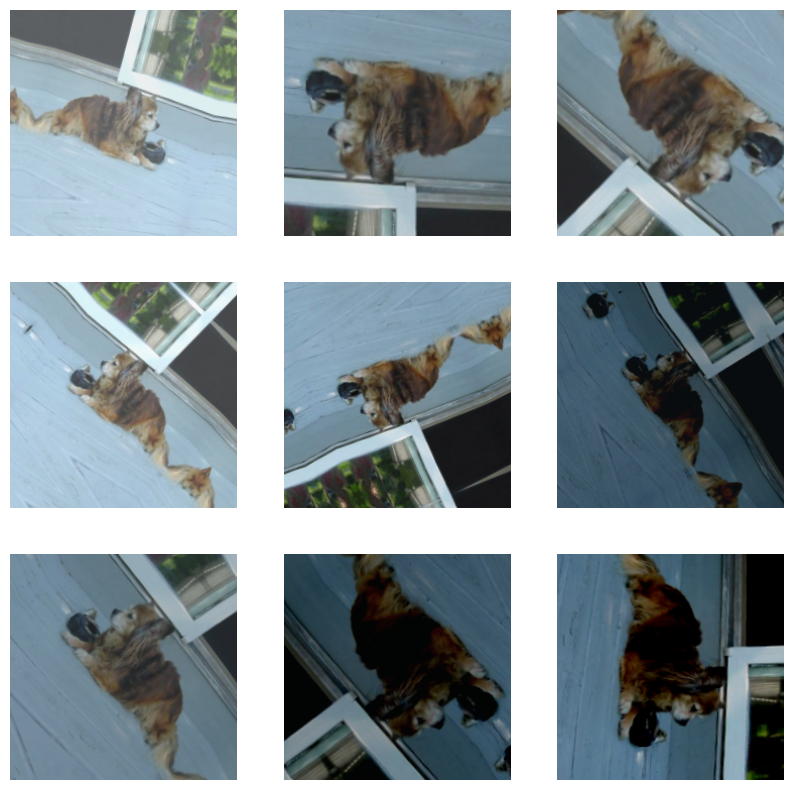

In [14]:
data_agumentor = Sequential([
    # Sharpen(),
    layers.RandomCrop(height=225,width=225,input_shape=(img_h,img_w,3)),
    layers.RandomFlip('horizontal',input_shape=(img_h,img_w,3)),
    layers.RandomZoom(0.5),
    layers.RandomBrightness(0.3),
    layers.RandomFlip('vertical',input_shape=(img_h,img_w,3)),
    layers.RandomContrast(0.3),
    layers.RandomRotation(0.37),
])

plt.figure(figsize=(10,10))
for images,_ in train_ds.take(1):
    for i in range(9):
        aug_imgs = data_agumentor(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(aug_imgs[0].numpy().astype('uint8'))
        plt.axis("off")

In [40]:
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential([
  data_agumentor,
  layers.Rescaling(1./255),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dropout(0.7),
  layers.Dense(24, activation='relu'),
  layers.Dropout(0.6),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer = Adam(learning_rate=0.00075), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 225, 225, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 225, 225, 3)       0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 112, 112, 3)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 56, 56, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 56, 56, 32)       

In [17]:
class StopAtThreshold(tf.keras.callbacks.Callback):
    def __init__(self, monitor='val_accuracy', threshold=0.90):
        super(StopAtThreshold, self).__init__()
        self.monitor = monitor
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is not None:
            if current >= self.threshold:
                print(f"\nEpoch {epoch}: Reached {self.monitor} of {current}, stopping training.")
                self.model.stop_training = True

In [41]:
train_acc = []
val_acc = []
train_loss = []
val_loss = []
epoch_range = []

In [46]:
from IPython.display import clear_output

loss_stopping = EarlyStopping(monitor='val_loss', patience=7)
hi_acc_stopping = StopAtThreshold(monitor='val_accuracy',threshold=0.9)

slowed_count = 0
regres = False
n = 1
alpha = 0.0005
full_process = False
for i in range(1,n+1):
    clear_output(wait=True)
    
    tf.keras.backend.set_value(model.optimizer.learning_rate, alpha)
    
    print("Phase:",i,"alpha:",float(model.optimizer.learning_rate))
    epochs = 10
    training_record = model.fit(
        train_ds,
        validation_data = val_ds,
        epochs = epochs,
        callbacks=[hi_acc_stopping]
    )

    train_acc += training_record.history['accuracy'] # getting training and validation accuracy
    val_acc += training_record.history['val_accuracy']

    train_loss += training_record.history['loss']
    val_loss += training_record.history['val_loss'] # getting training and validation loss

    last_acc = val_acc[-1]
    last_loss = val_loss[-1]
    
    #if len(train_loss)%20 == 0: alpha*= 0.75
    
    loss_diff = 0
    for i in range(epochs): loss_diff += train_loss[-(i+1)]-val_loss[-(i+1)]
    
    if loss_diff < 0.05: print("[WARNING] Learning Slowed!"); slowed_count += 1
    
    gradient = 0 # detecting learning greation. Also happens with overfitting.
    for i in range(0,epochs,2): gradient += (val_acc[i+1] - val_acc[i])/2
    gradient = gradient/(epochs//2)
    if gradient < 0 and regres:
        break
    elif gradient < -0.1: 
        print("[WARNING] Learning Regression!")
        regres = True
    elif gradient > 0:
        regres = False 
    
    if model.stop_training:break

full_process = True
print("Learing Slowed",slowed_count,"time.")

Phase: 1 alpha: 0.0005000000237487257
Epoch 1/10
21/21 [==============================] - 12s 356ms/step - loss: 1.7031 - accuracy: 0.2566 - val_loss: 1.6655 - val_accuracy: 0.2360
Epoch 2/10
21/21 [==============================] - 7s 363ms/step - loss: 1.6885 - accuracy: 0.2535 - val_loss: 1.6672 - val_accuracy: 0.2360
Epoch 3/10
21/21 [==============================] - 6s 302ms/step - loss: 1.7244 - accuracy: 0.2334 - val_loss: 1.6658 - val_accuracy: 0.2174
Epoch 4/10
21/21 [==============================] - 7s 329ms/step - loss: 1.6915 - accuracy: 0.2767 - val_loss: 1.6549 - val_accuracy: 0.2671
Epoch 5/10
21/21 [==============================] - 6s 299ms/step - loss: 1.6840 - accuracy: 0.2473 - val_loss: 1.6729 - val_accuracy: 0.2733
Epoch 6/10
21/21 [==============================] - 8s 367ms/step - loss: 1.6619 - accuracy: 0.2767 - val_loss: 1.6655 - val_accuracy: 0.2360
Epoch 7/10
21/21 [==============================] - 8s 362ms/step - loss: 1.6906 - accuracy: 0.2937 - val_los

In [19]:
if not full_process:
    train_acc += training_record.history['accuracy'] # getting training and validation accuracy
    val_acc += training_record.history['val_accuracy']

    train_loss += training_record.history['loss']
    val_loss += training_record.history['val_loss'] # getting training and validation loss

In [20]:
import math
def smoothen(lst,sample_rate=0.05):
    if len(lst) == 0: return []
    rlist = []
    area = math.ceil(sample_rate * len(lst))
    for upperbound in range(len(lst)):
        lowerbound = max(0,upperbound-area)
        # print(lowerbound,upperbound)
        sample = lst[lowerbound:upperbound+1].copy()
        sample.sort()
        median = math.ceil(0.5*len(sample))
        rlist.append(sample[median-1])
    return rlist

def gradient(lst,sampling=True,sample_rate=0.25):
    if len(lst)==0:return []
    rlist = []
    area = math.ceil(sample_rate* len(lst))
    if not sampling: area = 2
    for upperbound in range(len(lst)):
        lowerbound = max(0,upperbound - area)
        sample = lst[lowerbound:upperbound+1].copy()
        gradients = [(sample[i+1] - sample[i])/2 for i in range(0,len(sample)-1,2)]
        if len(sample) == 1: gradients = [0]
        gradients.sort()
        mid = math.ceil(0.5 * len(gradients))
        
        rlist.append(gradients[mid - 1])
    return rlist

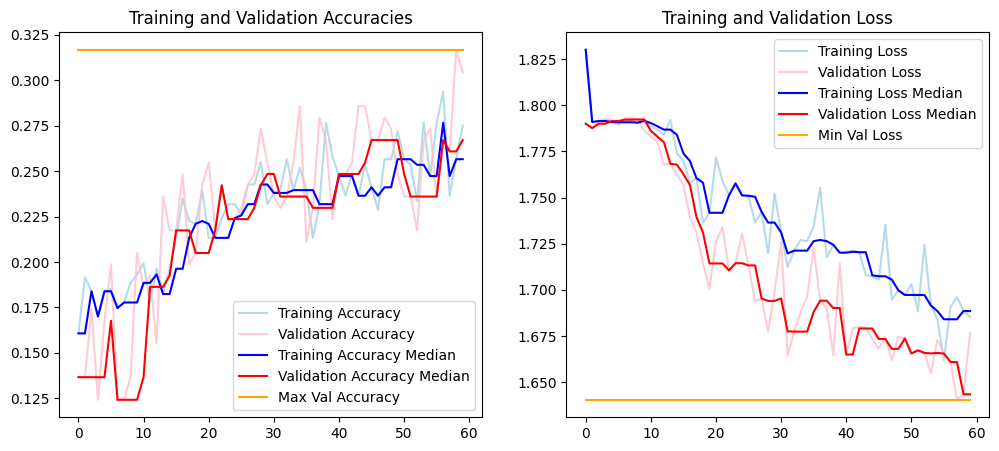

In [47]:
epoch_range = range(len(train_loss)) # getting a range for the epochs to act as a time scale.
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epoch_range,train_acc,color='lightblue',alpha= 0.9,label='Training Accuracy')
plt.plot(epoch_range,val_acc,color='pink',alpha= 0.8,label='Validation Accuracy')
plt.plot(epoch_range,smoothen(train_acc),color='blue',label='Training Accuracy Median')
plt.plot(epoch_range,smoothen(val_acc),color='red',label='Validation Accuracy Median')
plt.plot(epoch_range,[max(val_acc) for _ in range(len(epoch_range))],color='orange',label='Max Val Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracies')

plt.subplot(1,2,2)
plt.plot(epoch_range,train_loss,color='lightblue',alpha= 0.9,label='Training Loss')
plt.plot(epoch_range,val_loss,color='pink',alpha= 0.8,label='Validation Loss')
plt.plot(epoch_range,smoothen(train_loss),color='blue',label='Training Loss Median')
plt.plot(epoch_range,smoothen(val_loss),color='red',label='Validation Loss Median')
plt.plot(epoch_range,[min(val_loss) for _ in range(len(epoch_range))],color='orange',label='Min Val Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [48]:
Accuracies = {}
Var_av = {}

for animal_dir in list(testing_dir.iterdir()):
    class_count = 0
    correct_answers = 0
    scores = []
    for img_path in list(animal_dir.iterdir()):
        try:
            img = tf.keras.utils.load_img(
                img_path, target_size=(img_h, img_w)
            )
            class_count += 1
        except:
            continue

        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array,0)

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        scores.append(tuple(score.numpy()))
        
        if animal_dir.name == class_names[np.argmax(score)]: correct_answers += 1
    Accuracies[animal_dir.name] = correct_answers/class_count
    avgs = [sum(element[i] for element in scores)/class_count for i in range(num_classes)]
    mean_avgs = sum(avgs)/len(avgs)
    Var_av[animal_dir.name] = sum([pow(avgs[i] - mean_avgs,2) for i in range(len(avgs))]) #this migth not be saying what i want it to be saying...
    

1/1 [==============================] - 0s 24ms/step


In [49]:
print("Testing Accuracy:")
for key in Accuracies.keys():
    print("<"+key+">",Accuracies[key])

print()
print("Variance in Average Confidence")
for key in Accuracies.keys():
    print(key,"had",Var_av[key])

# bird scored 0.8571428571428571
# cat scored 0.8095238095238095
# dog scored 0.42857142857142855
# snake scored 0.9523809523809523

Testing Accuracy:
<beagle> 0.0
<English foxhound> 0.26666666666666666
<papillon> 0.0
<redbone> 0.8
<Shih-Tzu> 0.5333333333333333
<toy terrier> 0.13333333333333333

Variance in Average Confidence
beagle had 0.00039636955283228254
English foxhound had 0.003166139512648663
papillon had 0.0012603782772733652
redbone had 0.03763613850932387
Shih-Tzu had 0.002429488768123404
toy terrier had 0.001012126698328347


In [50]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

saved_file_name = project_folder + "_model_v"
version_count = 1
for dir in list(pathlib.Path(current_path + "\\models").glob("*.tflite")):
    if dir.name.startswith(saved_file_name): version_count += 1
saved_file_name += str(version_count)

# Save the model.
with open('models\\'+saved_file_name+".tflite", 'wb') as f:
  f.write(tflite_model)

print("File saved as",saved_file_name)

INFO:tensorflow:Assets written to: C:\Users\ArtBot\AppData\Local\Temp\tmpksajcs9g\assets


INFO:tensorflow:Assets written to: C:\Users\ArtBot\AppData\Local\Temp\tmpksajcs9g\assets


File saved as dog_model_v1
